In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii-Copy1.sqlite")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station= Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Inspector

In [9]:
inspector = inspect(engine)
inspector.get_table_names()
columns = inspector.get_columns('measurement')

In [10]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
most_recent = engine.execute('SELECT date FROM measurement ORDER BY date DESC LIMIT 1').fetchall()
most_recent

[('2017-08-23',)]

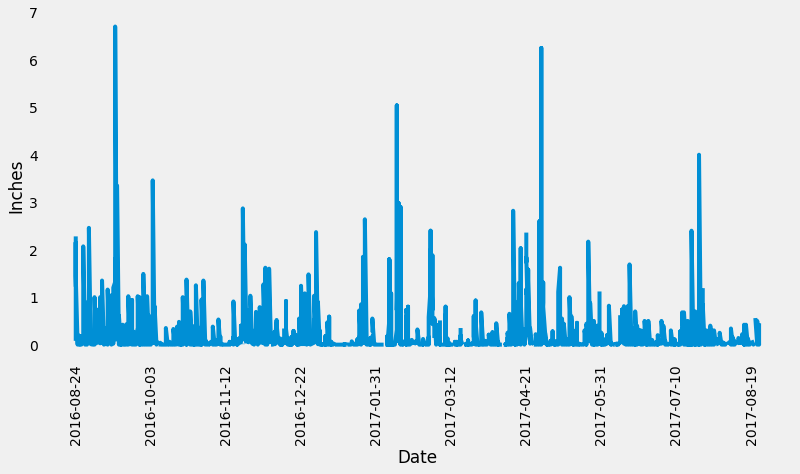

In [50]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores
precip_data = engine.execute("SELECT date, prcp FROM measurement WHERE date > '2016-08-23' ORDER BY date ASC").fetchall()
precip_data

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_data_df = pd.DataFrame(precip_data)
precip_data_df = precip_data_df.rename(columns = {0: 'Date', 1: 'Precip'})
precip_data_df = precip_data_df.set_index('Date')

# Sort the dataframe by date
precip_data_df.sort_index(0)

# Use Pandas Plotting with Matplotlib to plot the data
fig = plt.figure(figsize=(12, 6))

plt.xticks(np.arange(0, len(precip_data), 40), rotation = 90)

plt.ylabel("Inches")
plt.xlabel("Date")
plt.grid(b=None, which='major', axis='both')
# plt.savefig("../Images/precipitation.png") 
plt.plot(precip_data_df)
plt.show()


In [36]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_data_df["Precip"].agg(['mean', 'median', 'var', 'std', 'sem'])

mean      0.176462
median    0.020000
var       0.211865
std       0.460288
sem       0.010254
Name: Precip, dtype: float64

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()